<a href="https://colab.research.google.com/github/KVinayReddy7/21BDS0287-EDA/blob/main/Module5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODULE-5(Clustering Algorithms)**

**KATUKURI VINAY REDDY**

**21BDS0287**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist
from scipy.spatial.distance import cdist

# Loading the dataset from the new GitHub link
url = 'https://github.com/KVinayReddy7/21BDS0287-EDA/blob/main/credit%20card.csv?raw=true'
df = pd.read_csv(url)

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


**K-Means Clustering**

**Elbow Method**

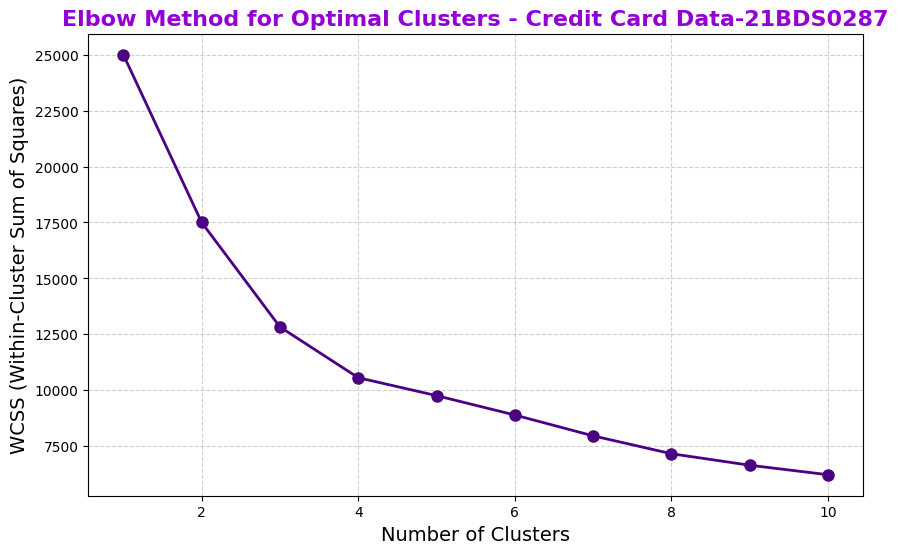

In [2]:
# Selecting relevant numerical columns for clustering
X = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]

# Standardizing the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):  # Checking for clusters from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS to identify the elbow point
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='indigo', linestyle='-', linewidth=2, markersize=8)

# Title and Labels
plt.title('Elbow Method for Optimal Clusters - Credit Card Data-21BDS0287', fontsize=16, fontweight='bold', color='darkviolet')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

**Fit K-Means Clustering**

Silhouette Score: 0.4509


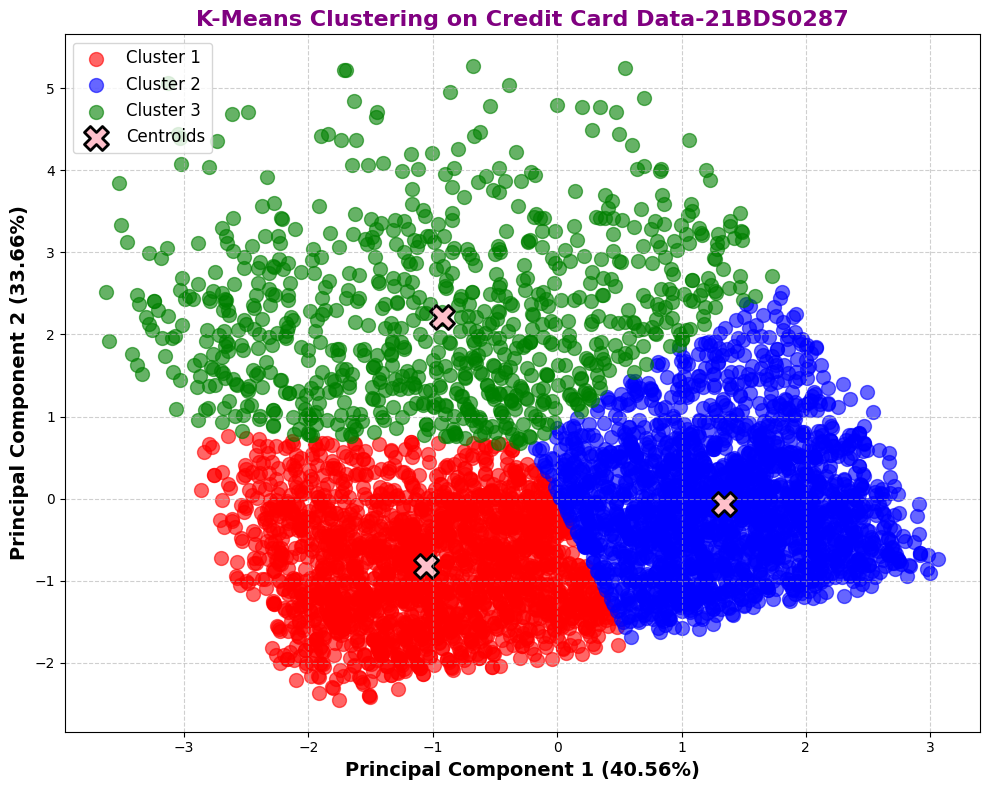

In [3]:
# Selecting relevant numerical columns for clustering
X = df[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]

# Standardizing the features for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_pca)

# Calculate the Silhouette Score
sil_score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score: {sil_score:.4f}")

# Visualizing the clusters
plt.figure(figsize=(10, 8))

# Plotting clusters
colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(X_pca[y_kmeans == i, 0], X_pca[y_kmeans == i, 1],
                s=100, c=colors[i], label=f'Cluster {i+1}', alpha=0.6)

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='pink', label='Centroids', marker='X', edgecolors='black', linewidths=2)

# Title and labels
plt.title('K-Means Clustering on Credit Card Data-21BDS0287', fontsize=16, fontweight='bold', color='purple')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=14, fontweight='bold')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=14, fontweight='bold')

# Legend and grid
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

**Distance Calculation**

In [4]:
# Calculate the Euclidean distance between each data point and the cluster centroids in the PCA space
euclidean_distances = cdist(X_pca, kmeans.cluster_centers_, metric='euclidean')

# Calculate the Manhattan distance (cityblock) between each data point and the cluster centroids
manhattan_distances = cdist(X_pca, kmeans.cluster_centers_, metric='cityblock')

# Calculate Cosine distance
cosine_distances = cdist(X_pca, kmeans.cluster_centers_, metric='cosine')

# Print the first 5 distances for each type
print('Euclidean Distances (first 5 points):\n', euclidean_distances[:5])
print('Manhattan Distances (first 5 points):\n', manhattan_distances[:5])
print('Cosine Distances (first 5 points):\n', cosine_distances[:5])

Euclidean Distances (first 5 points):
 [[1.19844548 3.69626484 3.78968482]
 [1.25902736 1.42041693 3.31258206]
 [1.14877395 2.19380037 3.87787165]
 [0.96397093 2.76801897 2.19548899]
 [0.51904196 2.68410862 3.54659956]]
Manhattan Distances (first 5 points):
 [[1.62490109 4.7785244  4.78647548]
 [1.34552383 1.98749064 4.23846813]
 [1.62380629 3.10247352 4.51675059]
 [1.25982744 2.89698369 2.64069557]
 [0.55198615 3.6374832  3.64543428]]
Cosine Distances (first 5 points):
 [[0.00294435 1.80907027 1.18597457]
 [0.57069604 0.7416995  1.98386129]
 [0.28603503 1.09003811 1.86213676]
 [0.24121623 1.99999046 0.56906181]
 [0.03320769 1.57071917 1.49883206]]


**Hierarchical Clustering**

**Statistical Summary**

In [5]:
#Summary of the dataset
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Online
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.596800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.490589
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,1.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000


**Dendrogram & Euclidean Distance**

Sample of Euclidean Distance Matrix:
 [ 30.82223224  42.96929136  52.69924098  12.97536127 157.2178107
  44.67672772  43.58543335 109.66312051 131.81157005  78.64883979]


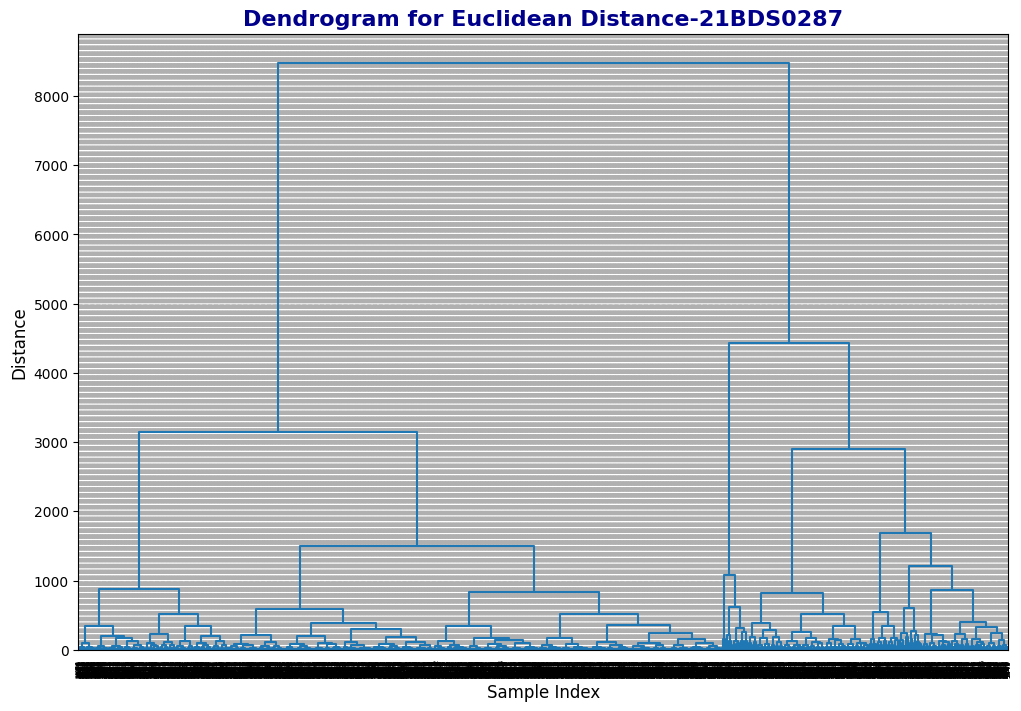

In [6]:
# Drop non-numeric and irrelevant columns (ID, ZIP Code)
numeric_data = df.drop(columns=['ID', 'ZIP Code'])

# Convert all columns to numeric (handling any categorical/object data)
numeric_data = numeric_data.apply(pd.to_numeric, errors='coerce')

# Fill any missing values (if any) with the column mean
numeric_data.fillna(numeric_data.mean(), inplace=True)

# 2. Compute the Euclidean distance matrix using pdist (pairwise distances)
euclidean_distances = pdist(numeric_data, metric='euclidean')
print("Sample of Euclidean Distance Matrix:\n", euclidean_distances[:10])

# 3. Perform hierarchical clustering using Ward’s method
linked = linkage(euclidean_distances, method='ward')

# 4. Plot Dendrogram
plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Euclidean Distance-21BDS0287', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

dendrogram(linked, color_threshold=0)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Dendogram & Manhattan Distance**

Sample of Manhattan Distance Matrix:
 [1073.1 3685.6 3083.1  251.6 1222.2  692.1 2926.3 1186.  2087.3 3750.8]


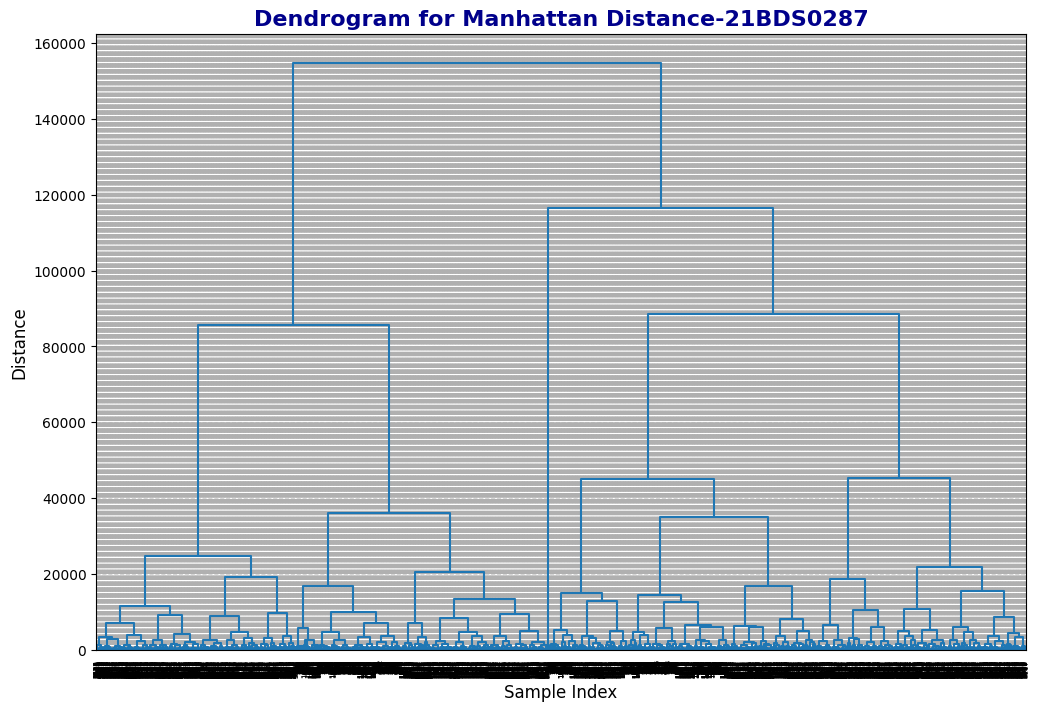

In [7]:
# Load and clean dataset
df = df.drop(columns=['id', 'Unnamed: 32'], errors='ignore')  # Drop non-numeric columns
df = df.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric, set non-numeric to NaN
df.fillna(df.mean(), inplace=True)  # Fill NaNs with column means

# Compute the Manhattan distance matrix
manhattan_distances = pdist(df, metric='cityblock')
print("Sample of Manhattan Distance Matrix:\n", manhattan_distances[:10])

# Perform hierarchical clustering using cleaned numeric data
linked_manhattan = linkage(df, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Manhattan Distance-21BDS0287', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

dendrogram(linked_manhattan, color_threshold=0)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

**Maximum Distance Matrix and Dendrogram**

Sample of Maximum Distance Matrix (Chebyshev):
 [0.79469567 0.31645651 0.93012981 0.7383752  0.64647206 0.65948517
 0.65856966 0.53232016 0.68554353 0.71015751]


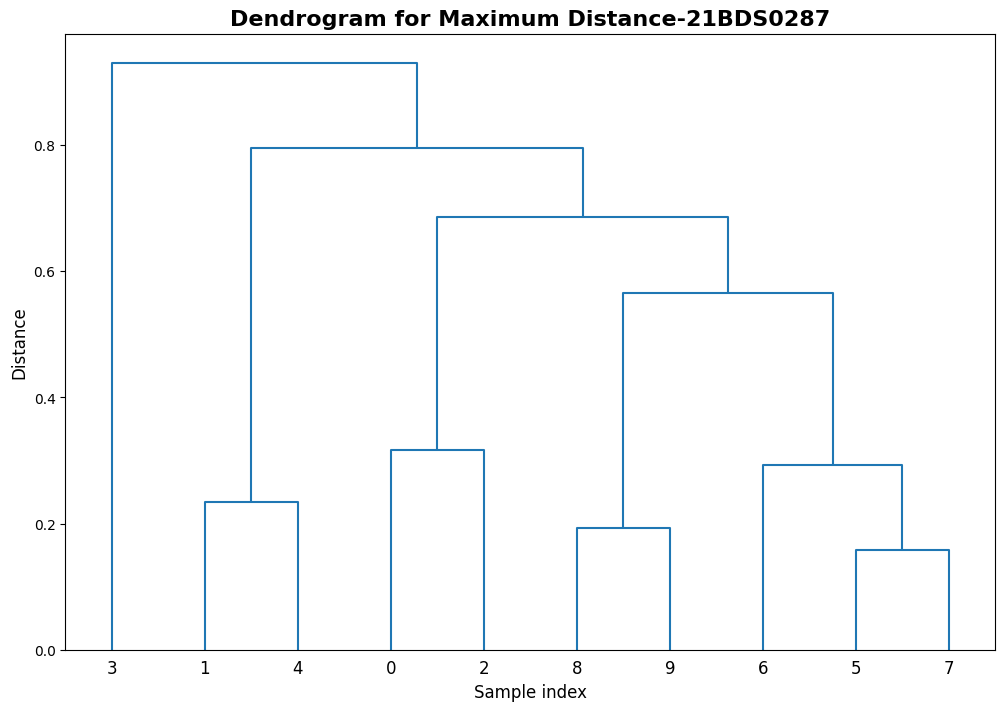

In [8]:
# Sample dataset (Replace with actual dataset)
np.random.seed(42)
dataset = np.random.rand(10, 3)  # 10 samples, 3 features

# 6. Compute the Maximum distance matrix using pdist (Chebyshev)
maximum_distances = pdist(dataset, metric='chebyshev')
print("Sample of Maximum Distance Matrix (Chebyshev):\n", maximum_distances[:10])

# 7. Dendrogram using Chebyshev distance with a valid method
linked_maximum = linkage(maximum_distances, method='complete')  # Use 'single', 'complete', or 'average'

# Set up the plot
plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Maximum Distance-21BDS0287', fontsize=16, fontweight='bold')
plt.xlabel('Sample index', fontsize=12)  # X-axis label
plt.ylabel('Distance', fontsize=12)  # Y-axis label

dendrogram(linked_maximum, color_threshold=0)

plt.gcf().set_facecolor('white')
plt.show()

**Minkowski Distance Matrix and Dendrogram**

Sample of Minkowski Distance Matrix (p=3):
 [0.88969425 0.32565935 0.94921979 0.87289545 0.65889976 0.66095592
 0.70304565 0.53822801 0.71849284 0.84544712]


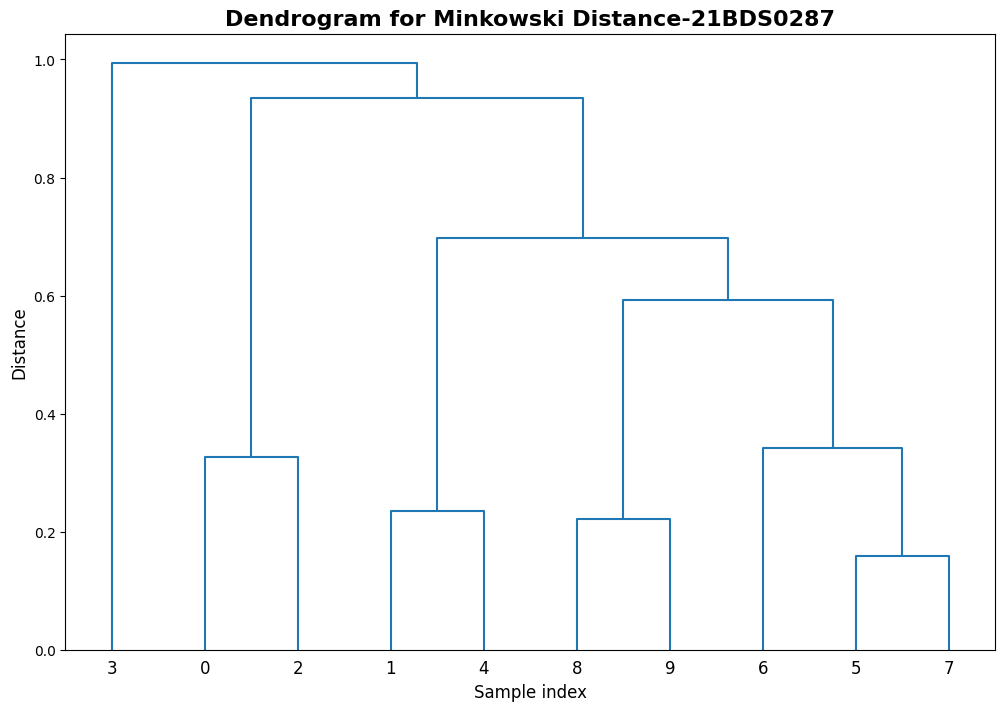

In [9]:
# Sample dataset (Replace with actual dataset)
np.random.seed(42)
dataset = np.random.rand(10, 3)  # 10 samples, 3 features

# 12. Compute the Minkowski distance matrix using pdist (p=3)
minkowski_distances = pdist(dataset, metric='minkowski', p=3)
print("Sample of Minkowski Distance Matrix (p=3):\n", minkowski_distances[:10])

# 13. Dendrogram for Minkowski distance (Fixed: Using valid linkage method)
linked_minkowski = linkage(minkowski_distances, method='complete')  # Use 'single', 'complete', or 'average'

plt.figure(figsize=(12, 8))
plt.title('Dendrogram for Minkowski Distance-21BDS0287', fontsize=16, fontweight='bold')
plt.xlabel('Sample index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

dendrogram(linked_minkowski, color_threshold=0)

plt.gcf().set_facecolor('white')

plt.show()